In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 

In [88]:
data = pd.read_csv('../onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [90]:
data.shape

(6362620, 11)

In [91]:
data.iloc[0:1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


In [92]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [93]:
data.duplicated().sum()

0

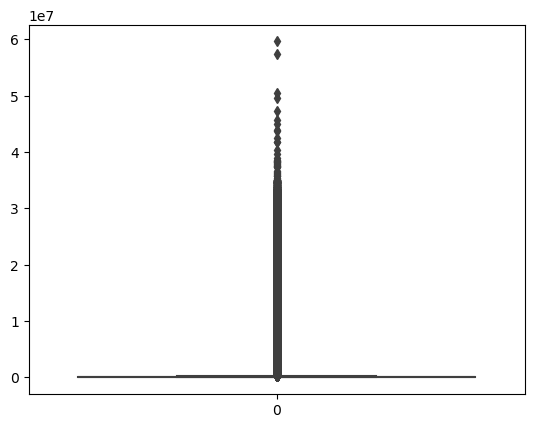

In [94]:
sb.boxplot(data.oldbalanceOrg)
plt.show()

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


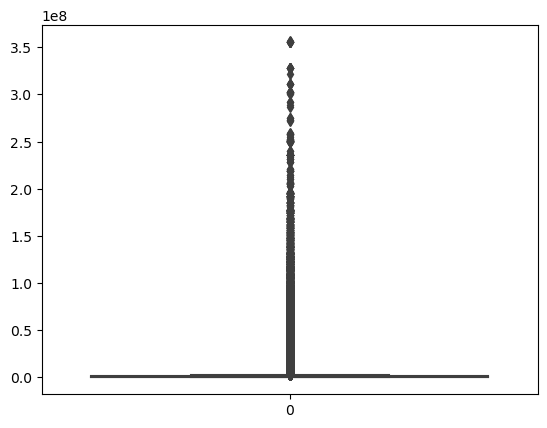

In [96]:
sb.boxplot(data['newbalanceDest'])
plt.show()

In [97]:
data.corr()

/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_67224/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


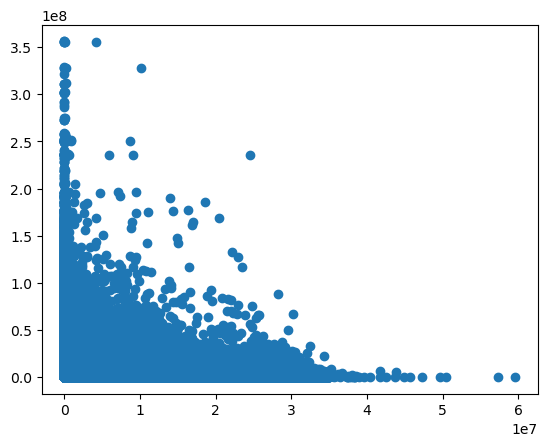

In [98]:
plt.scatter(data.oldbalanceOrg, data.newbalanceDest)
plt.show()

In [99]:
Q1 = np.percentile(data['amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_67224/1218648810.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['amount'], 25,
/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_67224/1218648810.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['amount'], 75,


In [100]:
IQR

195331.935

In [101]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [102]:
upper = np.where(data['amount'] >= (Q3+1.5*IQR))
lower = np.where(data['amount'] <= (Q1-1.5*IQR))

In [103]:
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

In [104]:
data.step

0            1
1            1
2            1
3            1
4            1
          ... 
6362609    742
6362610    742
6362611    742
6362614    743
6362615    743
Name: step, Length: 6024543, dtype: int64

In [105]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [106]:
data.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362609    CASH_OUT
6362610    TRANSFER
6362611    CASH_OUT
6362614    TRANSFER
6362615    CASH_OUT
Name: type, Length: 6024543, dtype: object

In [107]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [108]:
data.type.value_counts()

CASH_OUT    2185250
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: type, dtype: int64

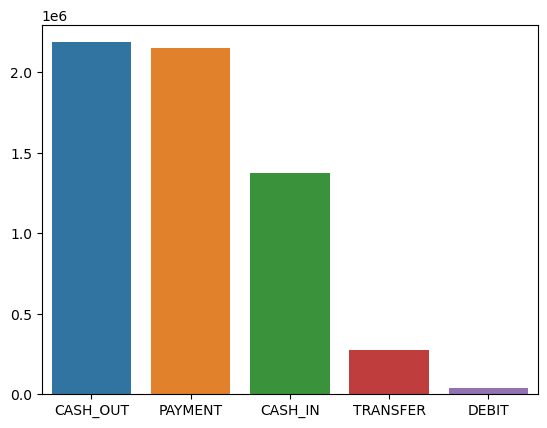

In [109]:
sb.barplot(x = data.type.value_counts().index, y = data.type.value_counts().values)
plt.show()

In [110]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06
mean,2.433126e+02,1.115342e+05,8.619578e+05,8.859128e+05,9.871264e+05,1.037883e+06,7.235404e-04,3.319754e-07
std,1.422881e+02,1.203984e+05,2.933836e+06,2.969976e+06,3.031559e+06,3.055336e+06,2.688897e-02,5.761730e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236855e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317584e+04,1.514600e+04,0.000000e+00,1.027301e+05,1.683203e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,1.134380e+05,1.602874e+05,8.249873e+05,9.251457e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017194e+05,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [111]:
data.amount

0            9839.64
1            1864.28
2             181.00
3             181.00
4           11668.14
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: amount, Length: 6024543, dtype: float64

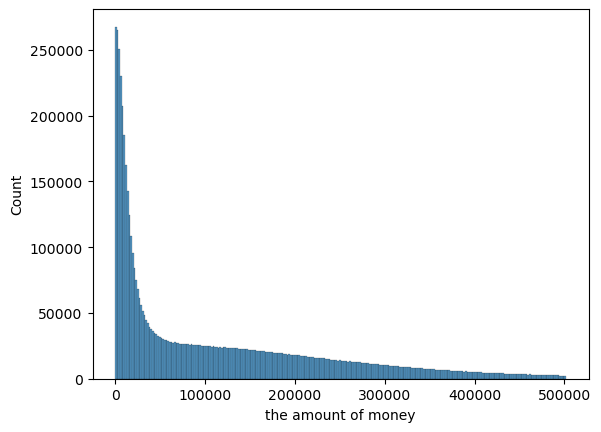

In [112]:
sb.histplot(data.amount)
plt.xlabel('the amount of money')
plt.show()

In [113]:
data.nlargest(10, 'amount')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1675737,159,CASH_OUT,501719.38,C1970677139,18653.00,0.00,C1619270798,235419.03,737138.41,0,0
1737199,161,CASH_OUT,501718.41,C1077569708,78605.00,0.00,C1924590813,697311.14,1199029.56,0,0
1082806,129,CASH_IN,501718.02,C970634468,20873140.30,21374858.32,C1091756447,5463193.08,5127569.29,0,0
2827303,226,CASH_OUT,501717.55,C855812747,121947.70,0.00,C914557298,1379104.08,1880821.63,0,0
2069077,181,CASH_IN,501717.33,C897630635,5120317.65,5622034.98,C1830915224,1314756.05,813038.72,0,0
5280111,372,CASH_OUT,501715.41,C555809067,96128.79,0.00,C1185830080,664493.22,1166208.64,0,0
2984534,231,CASH_IN,501715.19,C1586580516,4122.00,505837.19,C1796738748,0.00,0.00,0,0
1638216,157,CASH_IN,501710.64,C843040970,430.00,502140.64,C1864097021,0.00,0.00,0,0
2025441,180,CASH_IN,501710.41,C1109167155,14682491.62,15184202.03,C145739790,6008879.39,5507168.98,0,0
823098,41,TRANSFER,501709.63,C585977042,9846.00,0.00,C876306094,5932706.69,6434416.32,0,0


In [114]:
x = data.nlargest(10, 'amount').type
  
def unique(li):
    value_counts = []
    for i in li:
        c = li.count(i)
        value_counts.append((i,c))
    return value_counts

In [115]:
x

1675737    CASH_OUT
1737199    CASH_OUT
1082806     CASH_IN
2827303    CASH_OUT
2069077     CASH_IN
5280111    CASH_OUT
2984534     CASH_IN
1638216     CASH_IN
2025441     CASH_IN
823098     TRANSFER
Name: type, dtype: object

In [116]:
from collections import Counter
Counter(x)

Counter({'CASH_OUT': 4, 'CASH_IN': 5, 'TRANSFER': 1})

In [117]:
data.nlargest(10, 'amount').isFraud

1675737    0
1737199    0
1082806    0
2827303    0
2069077    0
5280111    0
2984534    0
1638216    0
2025441    0
823098     0
Name: isFraud, dtype: int64

In [118]:
Counter(data.nlargest(100, 'amount').type)

Counter({'CASH_OUT': 45, 'CASH_IN': 22, 'TRANSFER': 33})

In [119]:
x = data.nlargest(100, 'amount').isFraud
counter = 0
if 1 in x.values:
    counter +=1
counter

0

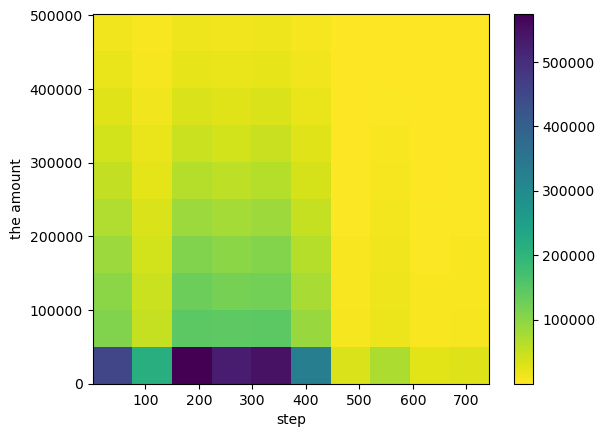

In [120]:
plt.hist2d(data= data, x = 'step', y = 'amount', cmin = 0.5,
    cmap = 'viridis_r' )
plt.colorbar()
plt.xlabel('step')
plt.ylabel('the amount')
plt.show()

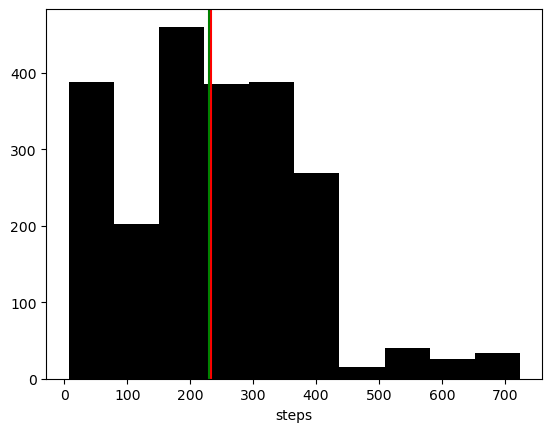

In [121]:
step_amount_avg = data[data.amount >= 500000]['step']
plt.hist(step_amount_avg, color = 'black')
plt.axvline(step_amount_avg.mean(), color = 'red')
plt.axvline(step_amount_avg.median(), color = 'green')
plt.xlabel('steps')
plt.show()

In [122]:
import scipy.stats as st
st.t.interval(alpha=0.90, df=len(step_amount_avg)-1,
              loc=np.mean(step_amount_avg),
              scale=st.sem(step_amount_avg))

/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_67224/398313531.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(step_amount_avg)-1,


(227.86889758368235, 237.97885955270186)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6024543 entries, 0 to 6362615
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 551.6+ MB


In [124]:
print(f'the number of unique values of nameOrig is : {round((len(data.nameOrig.unique()) * 100) / data.shape[0], 2)} %')

the number of unique values of nameOrig is : 99.86 %


In [125]:
data[data.nameOrig == 'C1065307291']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
361126,17,PAYMENT,5530.99,C1065307291,819637.87,814106.88,M1175397032,0.0,0.0,0,0
1799163,162,CASH_IN,88230.47,C1065307291,38128.00,126358.47,C1154752493,0.0,0.0,0,0
4829222,347,PAYMENT,19717.82,C1065307291,0.00,0.00,M2131079968,0.0,0.0,0,0


In [126]:
Messi = data.nameOrig.mode()

In [127]:
original_name = []
for i in Messi.values:
    original_name.append((i,data[data.nameOrig == i].shape[0]))
for j in original_name:
    print(j)

('C1065307291', 3)
('C1462946854', 3)
('C1530544995', 3)
('C1677795071', 3)
('C1784010646', 3)
('C1832548028', 3)
('C1902386530', 3)
('C1976208114', 3)
('C1999539787', 3)
('C2051359467', 3)
('C2098525306', 3)
('C363736674', 3)
('C400299098', 3)
('C724452879', 3)


In [128]:
data.nameOrig = data.nameOrig.str.replace('C','').astype('int')
data.rename(columns = {'nameOrig': 'client_id'}, inplace = True)

In [129]:
data.client_id

0          1231006815
1          1666544295
2          1305486145
3           840083671
4          2048537720
              ...    
6362609    1113162093
6362610     778071008
6362611     994950684
6362614    2013999242
6362615     786484425
Name: client_id, Length: 6024543, dtype: int64

In [130]:
data.oldbalanceOrg

0          170136.00
1           21249.00
2             181.00
3             181.00
4           41554.00
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: oldbalanceOrg, Length: 6024543, dtype: float64

In [131]:
data.oldbalanceOrg.describe()

count    6.024543e+06
mean     8.619578e+05
std      2.933836e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.514600e+04
75%      1.134380e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

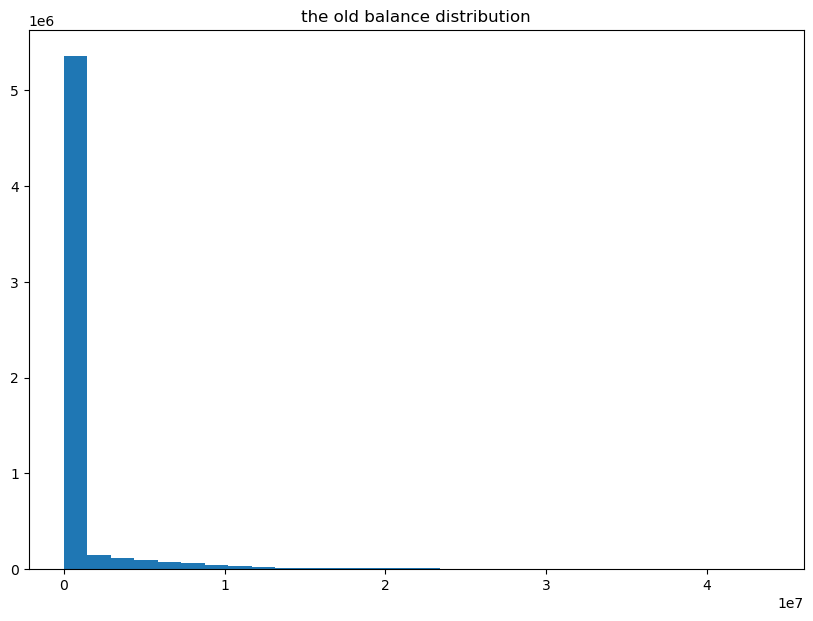

In [132]:
plt.figure(figsize = [10,7])
plt.hist(data.oldbalanceOrg, bins = 30)
plt.title('the old balance distribution')
plt.show()

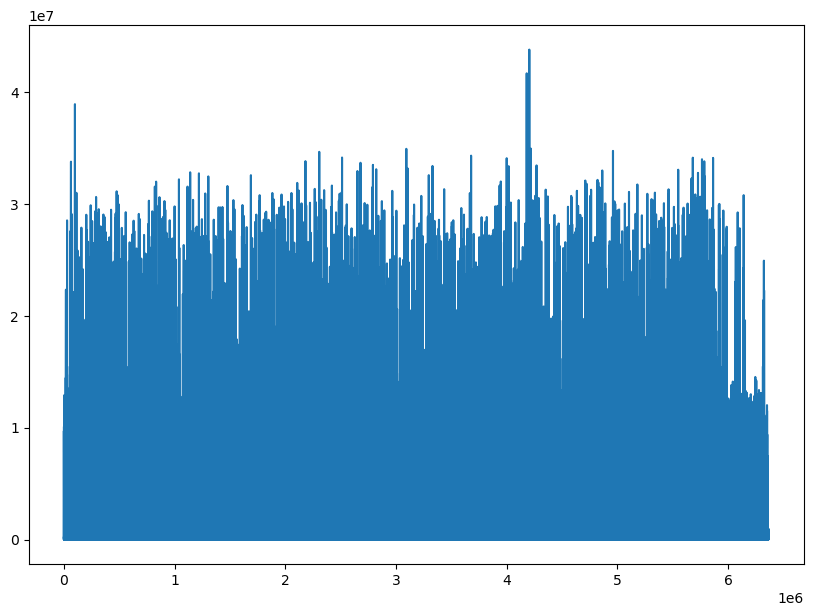

In [133]:
plt.figure(figsize = [10,7])
plt.plot(data.oldbalanceOrg)
plt.show()

In [134]:
data.nlargest(20, 'oldbalanceOrg')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4203639,305,CASH_OUT,132238.97,559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0
4180200,304,PAYMENT,8301.85,1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
100307,10,CASH_IN,6808.99,1841909664,38939424.03,38946233.02,C734236179,97006.33,90197.34,0,0
100306,10,CASH_IN,376022.62,1450387949,38563401.41,38939424.03,C1050374066,1812980.49,1720832.30,0,0
100305,10,CASH_IN,121569.82,1576842193,38441831.60,38563401.41,C1283626649,304887.13,263945.32,0,0
100304,10,CASH_IN,77083.57,1040382471,38364748.02,38441831.60,C1940815076,180735.97,103652.40,0,0
100303,10,CASH_IN,105150.78,1273896430,38259597.25,38364748.02,C1142840636,545669.97,25148.24,0,0
100302,10,CASH_IN,92897.18,1319675286,38166700.07,38259597.25,C734480558,98196.34,5299.16,0,0


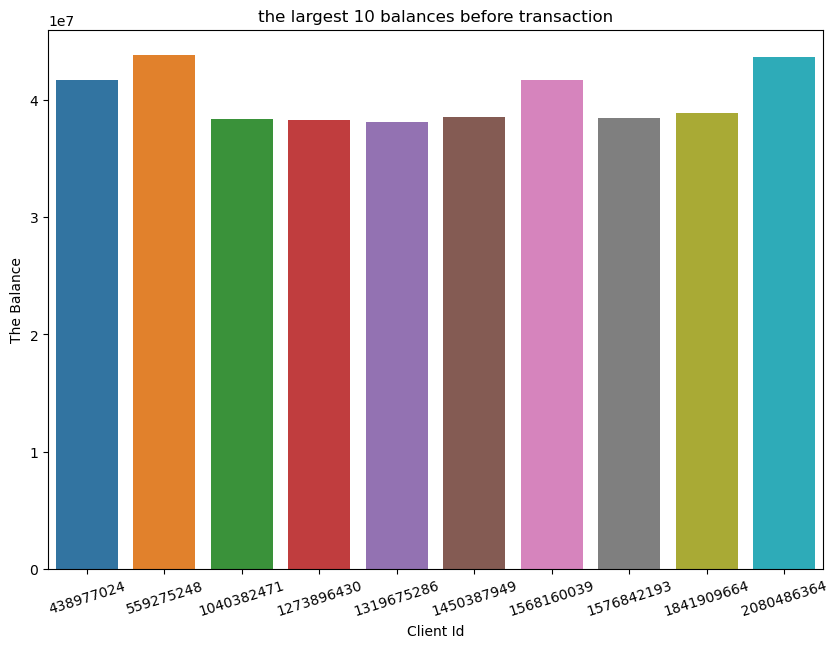

In [135]:
plt.figure(figsize = [10,7])
sb.barplot(x = data.nlargest(10, 'oldbalanceOrg').client_id, y = data.nlargest(10, 'oldbalanceOrg').oldbalanceOrg)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances before transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()

In [136]:
data.newbalanceOrig

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362609         0.00
6362610         0.00
6362611         0.00
6362614         0.00
6362615         0.00
Name: newbalanceOrig, Length: 6024543, dtype: float64

In [137]:
data.newbalanceOrig.describe()

count    6.024543e+06
mean     8.859128e+05
std      2.969976e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.602874e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

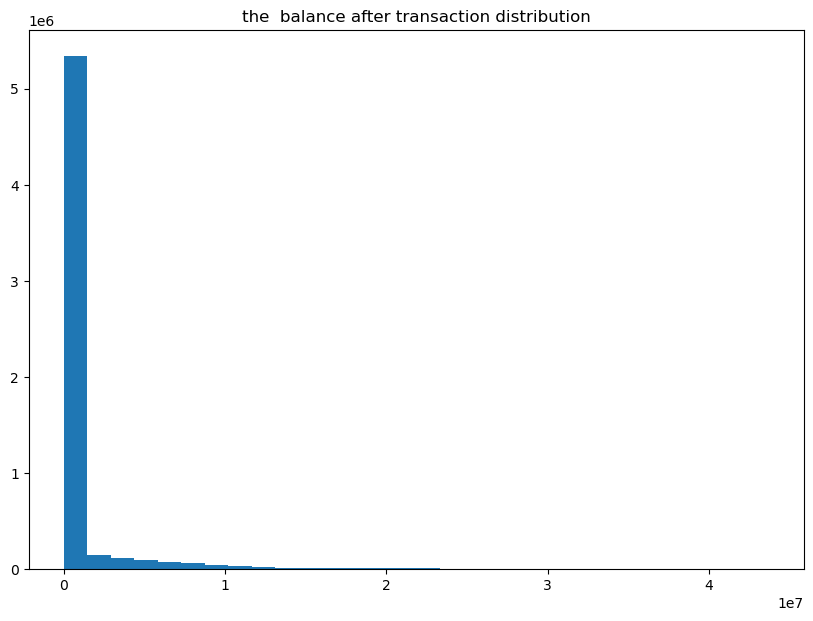

In [138]:
plt.figure(figsize = [10,7])
plt.hist(data.newbalanceOrig, bins = 30)
plt.title('the  balance after transaction distribution')
plt.show()

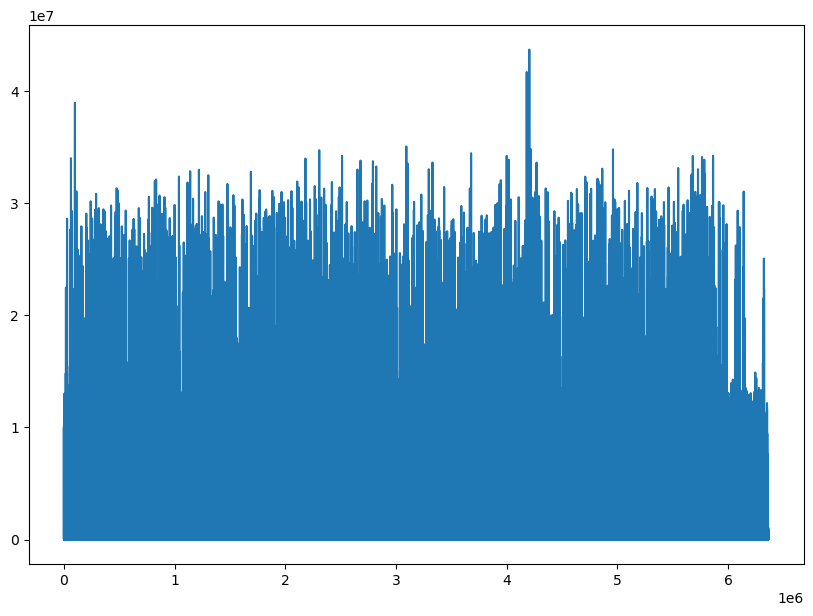

In [139]:
plt.figure(figsize = [10,7])
plt.plot(data.newbalanceOrig)
plt.show()

In [140]:
data.nlargest(20, 'newbalanceOrig')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4203639,305,CASH_OUT,132238.97,559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0
4180200,304,PAYMENT,8301.85,1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
100307,10,CASH_IN,6808.99,1841909664,38939424.03,38946233.02,C734236179,97006.33,90197.34,0,0
100306,10,CASH_IN,376022.62,1450387949,38563401.41,38939424.03,C1050374066,1812980.49,1720832.30,0,0
100305,10,CASH_IN,121569.82,1576842193,38441831.60,38563401.41,C1283626649,304887.13,263945.32,0,0
100304,10,CASH_IN,77083.57,1040382471,38364748.02,38441831.60,C1940815076,180735.97,103652.40,0,0
100303,10,CASH_IN,105150.78,1273896430,38259597.25,38364748.02,C1142840636,545669.97,25148.24,0,0
100302,10,CASH_IN,92897.18,1319675286,38166700.07,38259597.25,C734480558,98196.34,5299.16,0,0


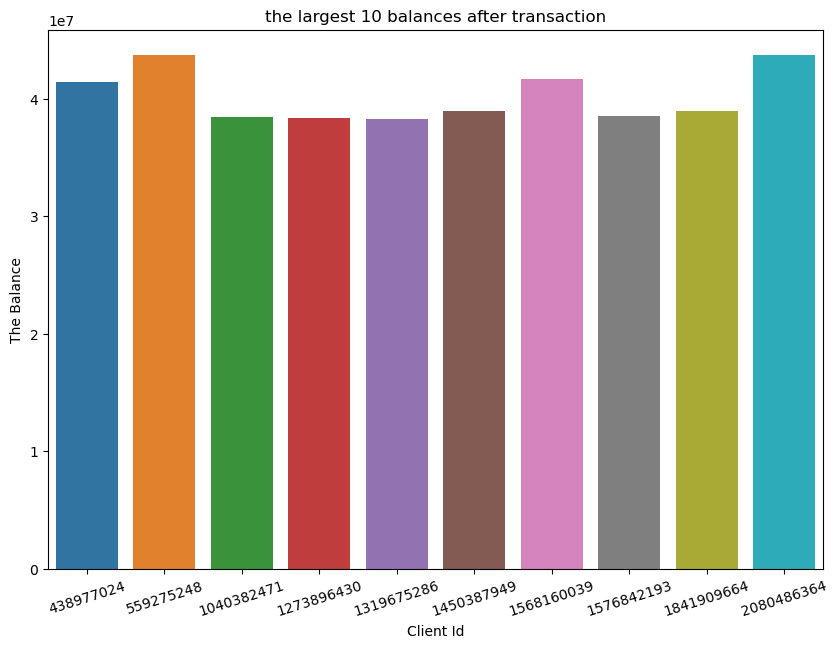

In [141]:
plt.figure(figsize = [10,7])
sb.barplot(x = data.nlargest(10, 'newbalanceOrig').client_id, y = data.nlargest(10, 'newbalanceOrig').newbalanceOrig)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances after transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()

In [142]:
num_of_samples = 10 / data.shape[0]

In [143]:
data.shape[0]

6024543

In [144]:
samp1 = data.sample(n = 600000)

In [145]:
samp1

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4814302,346,CASH_IN,24784.27,1185856227,37657.00,62441.27,C1960515353,230005.67,205221.41,0,0
1650999,158,CASH_OUT,203699.00,665964920,0.00,0.00,C1774959967,1045262.71,1248961.71,0,0
4856855,348,CASH_IN,111790.19,1321127481,6542699.61,6654489.80,C555913543,399132.35,287342.16,0,0
3711887,277,CASH_IN,19670.93,409792284,5366264.26,5385935.19,C482039655,190871.11,171200.19,0,0
1708496,160,PAYMENT,31180.87,1831400339,91427.64,60246.78,M612918570,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5180984,359,PAYMENT,1545.28,1303187374,0.00,0.00,M1174560183,0.00,0.00,0,0
5151257,357,CASH_IN,136642.30,1088596644,958542.74,1095185.04,C1547538538,2258750.81,2122108.50,0,0
797245,40,PAYMENT,1717.19,402061998,469459.47,467742.27,M1919960641,0.00,0.00,0,0
5634096,395,PAYMENT,23237.98,994610710,0.00,0.00,M375471249,0.00,0.00,0,0


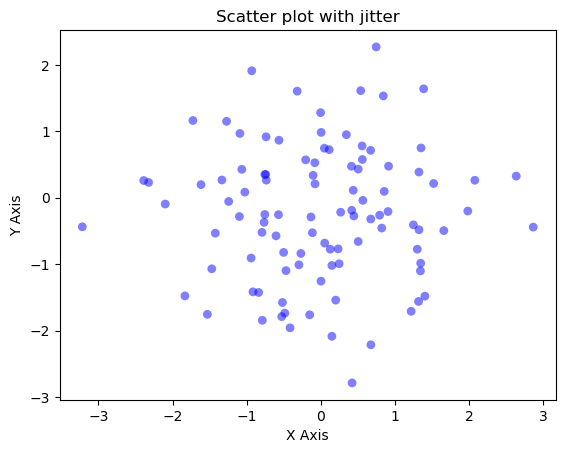

In [146]:
# Generate some random data
x = np.random.normal(0, 1, size=100)
y = np.random.normal(0, 1, size=100)

# Create a scatter plot with jitter
plt.scatter(x=x, y=y, alpha=0.5, edgecolors='none', s=40, c='blue', linewidth=0.5, rasterized=True)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter plot with jitter')
plt.show()

In [147]:
data[['oldbalanceOrg', 'newbalanceOrig']].corr()

,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.999514
newbalanceOrig,0.999514,1.000000


In [148]:
data['balance_diff'] = data.oldbalanceOrg - data.newbalanceOrig

In [149]:
data.balance_diff.describe()

count    6.024543e+06
mean    -2.395505e+04
std      9.888992e+04
min     -5.017180e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.776675e+03
max      5.016732e+05
Name: balance_diff, dtype: float64

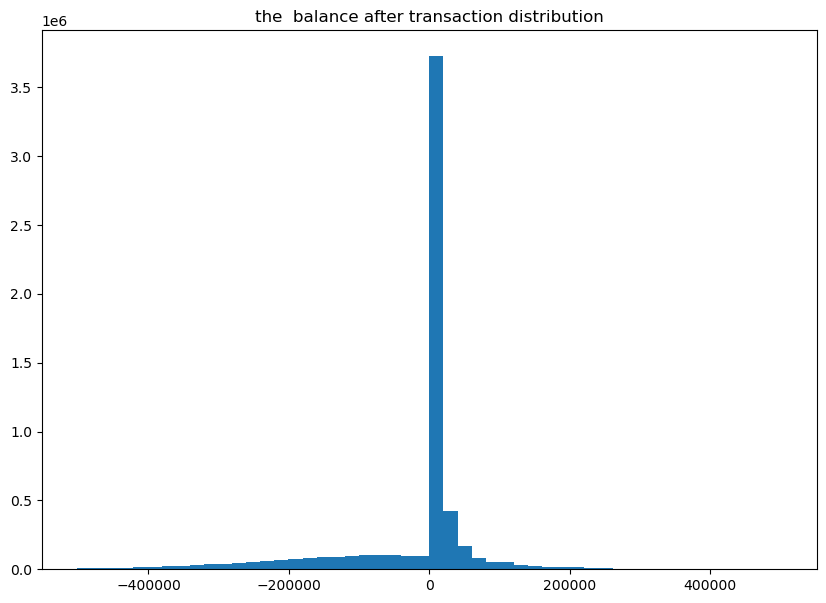

In [150]:
plt.figure(figsize = [10,7])
plt.hist(data.balance_diff, bins=50)
plt.title('the  balance after transaction distribution')
plt.show()

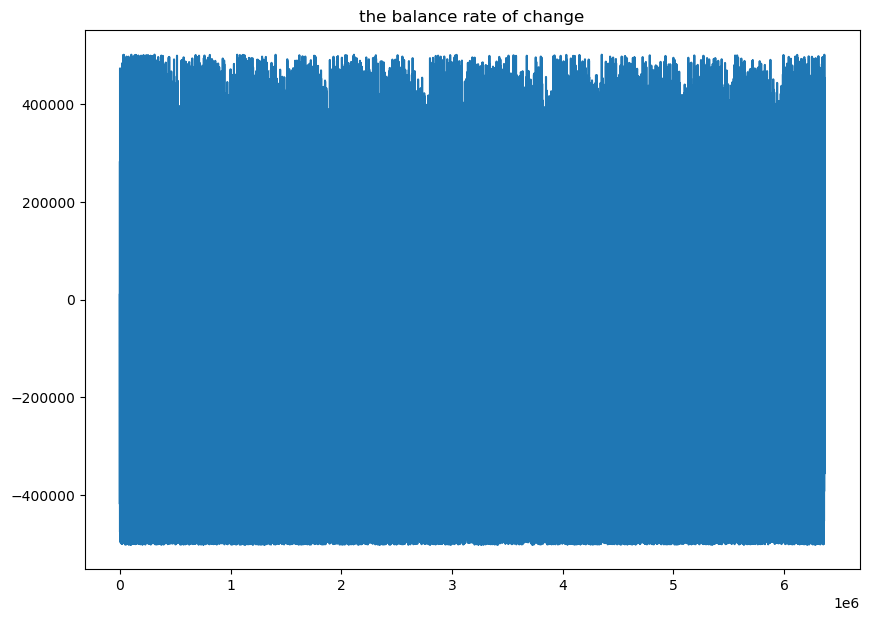

In [151]:
plt.figure(figsize=[10,7])
plt.plot(data.balance_diff)
plt.title('the balance rate of change')
plt.show()

In [152]:
data.head()


,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


In [153]:
data.nameDest.describe()

count         6024543
unique        2716238
top       C1286084959
freq               91
Name: nameDest, dtype: object

In [154]:
data.nameDest.mode()

0    C1286084959
Name: nameDest, dtype: object

In [155]:
# get top 10 most frequent client distination id
n = 10
data['nameDest'].value_counts()[:n]

C1286084959    91
C985934102     87
C977993101     86
C2083562754    86
C1360767589    82
C1590550415    82
C392292416     81
C248609774     81
C1789550256    81
C451111351     80
Name: nameDest, dtype: int64

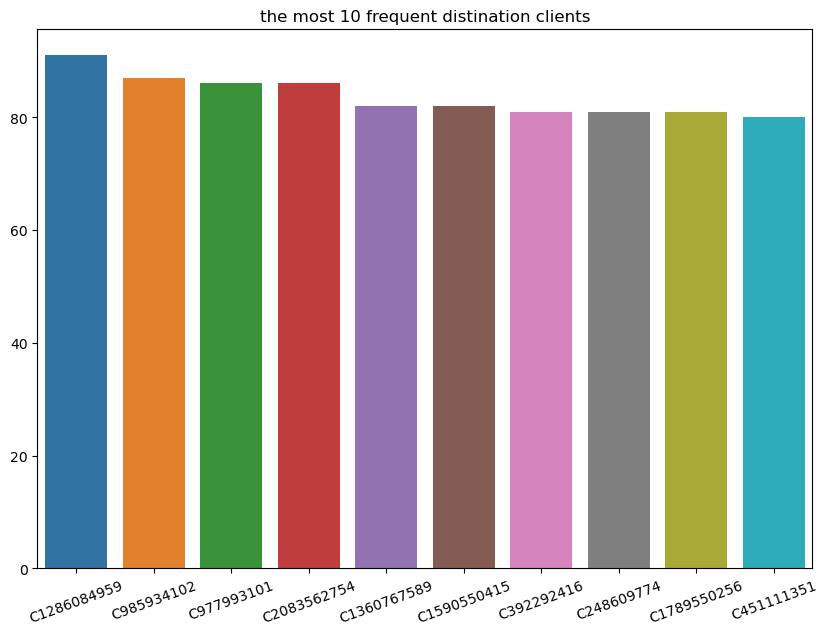

In [156]:
plt.figure(figsize = [10, 7])
sb.barplot(x = data['nameDest'].value_counts()[:n].index, y = data['nameDest'].value_counts()[:n].values)
plt.xticks(rotation = 20)
plt.title('the most 10 frequent distination clients')
plt.show()

In [157]:
data[data.nameDest == 'C1286084959']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
367,1,TRANSFER,176334.26,169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0,45136.00
388,1,CASH_OUT,373068.26,1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0,20034.00
471,1,CASH_IN,403418.39,848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0,-403418.39
642,1,CASH_IN,222126.95,870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0,-222126.95
659,1,CASH_IN,317393.38,1197721383,8906617.38,9224010.75,C1286084959,1175483.65,2107778.11,0,0,-317393.37
...,...,...,...,...,...,...,...,...,...,...,...,...
4810092,346,CASH_OUT,84205.39,86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0,0,0.00
4832993,347,CASH_OUT,235564.75,1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0,0,0.00
5566959,393,CASH_IN,119568.31,1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0,0,-119568.32
5596560,394,CASH_OUT,381887.53,1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0,0,50447.00


In [158]:
totti = data[data.nameDest == 'C1286084959']
totti.describe()

,step,amount,client_id,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
count,91.000000,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.0,91.0,91.000000
mean,50.714286,206309.763297,1.002663e+09,1.892348e+06,1.953412e+06,1.362347e+07,1.437131e+07,0.0,0.0,-61064.217582
std,103.593145,132179.220078,6.406173e+08,2.819321e+06,2.907859e+06,1.564074e+07,1.545007e+07,0.0,0.0,140952.576098
min,1.000000,2373.110000,1.311740e+07,0.000000e+00,0.000000e+00,8.580903e+05,1.378570e+06,0.0,0.0,-425052.420000
25%,2.500000,98940.590000,5.029396e+08,0.000000e+00,0.000000e+00,2.584442e+06,2.107778e+06,0.0,0.0,-132708.380000
50%,8.000000,189251.840000,9.600608e+08,5.819826e+04,0.000000e+00,1.162832e+07,1.295976e+07,0.0,0.0,0.000000
75%,17.500000,288275.840000,1.641864e+09,3.664394e+06,3.997775e+06,1.874441e+07,1.889081e+07,0.0,0.0,0.000000
max,401.000000,483544.300000,2.112648e+09,1.092285e+07,1.104356e+07,6.226261e+07,6.245186e+07,0.0,0.0,274115.550000


In [159]:
totti[totti.newbalanceDest == totti.newbalanceDest.max()]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
5792331,401,CASH_OUT,189251.84,1256632176,22224.0,0.0,C1286084959,62262609.11,62451860.94,0,0,22224.0


In [160]:
totti[(totti.isFraud == 1) | (totti.isFlaggedFraud == 1)]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff


In [161]:
data[data.isFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2,1,TRANSFER,181.00,1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00
251,1,TRANSFER,2806.00,1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,2806.00
252,1,CASH_OUT,2806.00,2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,2806.00
680,1,TRANSFER,20128.00,137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,20128.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,339682.13


In [162]:
data[data.isFlaggedFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
6205439,586,TRANSFER,353874.22,1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,0.0
6281484,646,TRANSFER,399045.08,724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1,0.0


In [163]:
# get top 10 most frequent fraud distination clients
x = data[data.isFraud == 1]
n = 10
Ramos = x['nameDest'].value_counts()[:n]
Ramos

C1325541393    2
C505532836     2
C410033330     2
C935310781     2
C200064275     2
C475338087     2
C1148781766    2
C1656842502    2
C1460854172    2
C686334805     2
Name: nameDest, dtype: int64

In [164]:
for i in Ramos.index:
    if i in data['nameDest'].value_counts()[:n].index:
        print(i)

In [165]:
data.nameDest = data.nameDest.replace('C','')
data.nameDest = data.nameDest.replace('M','')
data.rename(columns = {'nameDest' : 'distination_client_id'}, inplace = True)

In [166]:
data.isFraud.value_counts()

0    6020184
1       4359
Name: isFraud, dtype: int64

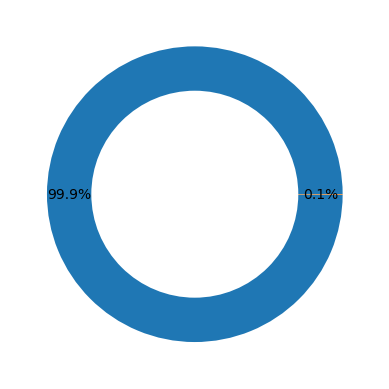

In [167]:
plt.pie(data.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [168]:
# class count
class_count_0, class_count_1 = data['isFraud'].value_counts()

# Separate class
class_0 = data[data['isFraud'] == 0]
class_1 = data[data['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6020184, 12)
class 1: (4359, 12)


total class of 1 and0: 0    4359
1    4359
Name: isFraud, dtype: int64


<AxesSubplot: title={'center': 'count (target)'}>

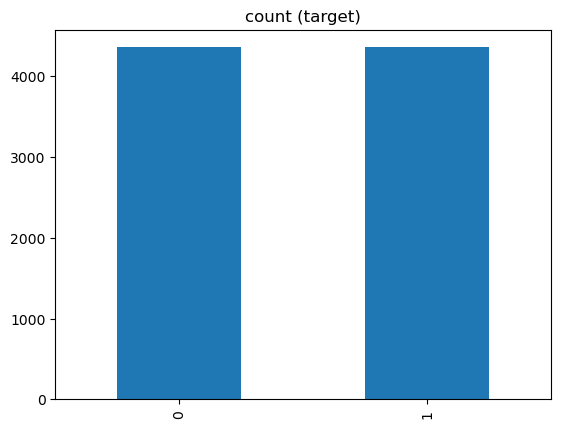

In [169]:
class_0_under = class_0.sample(class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [170]:
balancing_data

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
3113471,235,CASH_OUT,278978.94,2108339125,0.00,0.00,C728846425,2299415.41,2578394.35,0,0,0.00
4625256,329,CASH_OUT,191879.87,1773808584,0.00,0.00,C1760197965,296637.50,488517.37,0,0,0.00
3939886,286,PAYMENT,13483.76,1959126178,22428.00,8944.24,M1522386786,0.00,0.00,0,0,13483.76
3590813,262,DEBIT,2536.60,1144629631,585973.00,583436.40,C157689208,93767.93,96304.53,0,0,2536.60
3592970,262,PAYMENT,3980.12,1182741349,304229.48,300249.37,M437803208,0.00,0.00,0,0,3980.11
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,339682.13


In [171]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 3113471 to 6362615
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   step                   8718 non-null   int64  
 1   type                   8718 non-null   object 
 2   amount                 8718 non-null   float64
 3   client_id              8718 non-null   int64  
 4   oldbalanceOrg          8718 non-null   float64
 5   newbalanceOrig         8718 non-null   float64
 6   distination_client_id  8718 non-null   object 
 7   oldbalanceDest         8718 non-null   float64
 8   newbalanceDest         8718 non-null   float64
 9   isFraud                8718 non-null   int64  
 10  isFlaggedFraud         8718 non-null   int64  
 11  balance_diff           8718 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 885.4+ KB


In [172]:
balancing_data.type.unique()

array(['CASH_OUT', 'PAYMENT', 'DEBIT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

In [173]:
balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [174]:
balancing_data.type.dtype

dtype('int64')

In [175]:
balancing_data.columns

Index(['step', 'type', 'amount', 'client_id', 'oldbalanceOrg',
       'newbalanceOrig', 'distination_client_id', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_diff'],
      dtype='object')

In [176]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

In [177]:
x

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2,1,TRANSFER,181.00,1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00
251,1,TRANSFER,2806.00,1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,2806.00
252,1,CASH_OUT,2806.00,2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,2806.00
680,1,TRANSFER,20128.00,137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,20128.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,339682.13


In [178]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [180]:
X_train.shape,X_test.shape

((6974, 5), (1744, 5))

In [181]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.22827646e+00 1.44121501e+05 5.25110285e+05 4.49617197e+05
 7.54930875e+04]


In [182]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [184]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [185]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9212790364209923
Testing Accuracy: 0.9231651376146789
Testing Confusion Matrix: 
[[847  30]
 [104 763]]
Recall Score :  0.9231651376146789
Precision Score :  0.9231651376146789
Testing F-1: 0.9231651376146789
Testing F-Beta: 0.9231651376146789
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9826498422712934
Testing Accuracy: 0.981651376146789
Testing Confusion Matrix: 
[[849  28]
 [  4 863]]
Recall Score :  0.981651376146789
Precision Score :  0.981651376146789
Testing F-1: 0.981651376146789
Testing F-Beta: 0.981651376146789
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9931192660550459
Testing Confusion Matrix: 
[[869   8]
 [  4 863]]
Recall Score :  0.9931192660550459
Precision Score :  0.9931192660550459
Testing F-1: 0.9931192660550459
Testing F-Beta: 0.993119266055046
------------------------------
Training Model RF 
-----------

/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/m

Training Accuracy: 0.9998566102667049
Testing Accuracy: 0.9919724770642202
Testing Confusion Matrix: 
[[866  11]
 [  3 864]]
Recall Score :  0.9919724770642202
Precision Score :  0.9919724770642202
Testing F-1: 0.9919724770642202
Testing F-Beta: 0.9919724770642202
------------------------------
Training Model XGB 
--------------
Training Accuracy: 0.9958416977344422
Testing Accuracy: 0.9931192660550459
Testing Confusion Matrix: 
[[869   8]
 [  4 863]]
Recall Score :  0.9931192660550459


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/m

Precision Score :  0.9931192660550459
Testing F-1: 0.9931192660550459
Testing F-Beta: 0.993119266055046
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.5762833381129912
Testing Accuracy: 0.5774082568807339
Testing Confusion Matrix: 
[[140 737]
 [  0 867]]
Recall Score :  0.5774082568807339
Precision Score :  0.5774082568807339
Testing F-1: 0.5774082568807339
Testing F-Beta: 0.5774082568807339
------------------------------
Training Model SVC 
--------------


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/m

Training Accuracy: 0.9561227416117006
Testing Accuracy: 0.9610091743119266
Testing Confusion Matrix: 
[[813  64]
 [  4 863]]
Recall Score :  0.9610091743119266
Precision Score :  0.9610091743119266
Testing F-1: 0.9610091743119266
Testing F-Beta: 0.9610091743119267
------------------------------


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.8/site-packages/sklearn/m

In [186]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [187]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [188]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.31%


In [189]:
rounded_y = np.round(y_pred)
unique_val = pd.DataFrame(y_test)
unique_val[0].unique()

array([1, 0])

In [190]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique_val[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[869,   8],
        [  4, 863]],

       [[863,   4],
        [  8, 869]]])

In [191]:
data.head()

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


In [192]:
if  model.predict([[2,9839.64,170136.0,160296.36,9839.64]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

not Fraud
